In [1]:
import numpy as np
from engine import AdvRw2, Urban
from agent import IndQLearningAgent, IndQLearningAgentSoftmax
from agent_constraints import RestrictedIndQLearningAgent
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
env = Urban()

In [3]:
env.actionDM2idx([0, 1, 4])

9

In [4]:
env.idx2actionDM(9)

[0, 1, 4]

In [8]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def plot(r0ss, r1ss=None, dir="default"):
    # We set a fancy theme
    plt.style.use('ggplot')
    N_EXP = len(r0ss)
    #plt.axis([0, max_steps*n_iter, -4.5, 1.5])
    for i in range(N_EXP):
        plt.plot(moving_average(r0ss[i], 100), 'b', alpha=0.05)
        #plt.plot(moving_average(r1ss[i], 100), 'r', alpha=0.05)

    plt.plot(moving_average(np.asarray(r0ss).mean(axis=0), 100), 'b', alpha=0.5)
    #plt.plot(moving_average(np.asarray(r1ss).mean(axis=0), 100), 'r', alpha=0.5)

    plt.xlabel('t');
    plt.ylabel('R');

    from matplotlib.lines import Line2D
    cmap = plt.cm.coolwarm
    custom_lines = [Line2D([0], [0], color='b'),
                    Line2D([0], [0], color='r')]

    plt.legend(custom_lines,['Agent A', 'Agent B']);
    plt.savefig(dir + '.png')

## Q-Learners

0


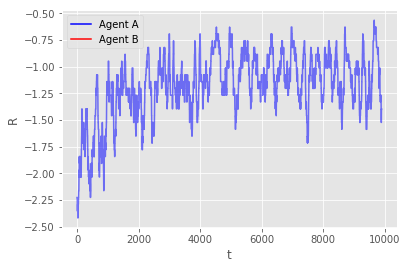

In [14]:
N_EXP = 1

r0ss = []
r1ss = []
#
for n in range(N_EXP):

    gamma = 0.99

    env = Urban()
    ##
    #P2 =  ExpSmoother(env.available_actions, env.available_actions, learning_rate=0.8)
    #P1 =  RandomAgent( env.available_actions, p=0.5)
    P1 = RestrictedIndQLearningAgent(env.available_actions_DM, env.n_states, learning_rate=.33,
                           epsilon=0.1, gamma=gamma, enemy_action_space=None)

    
    n_iter = 5000     


    r0s = []
    r1s = []

    for i in range(n_iter):

        # A full episode:
        done = False
        s = env.state
        ss = env.state2idx(s)
        a1 = env.actionDM2idx([1, 2, 1])
        #print(s)

        while not done:
            
            #print(env.state)

            # Agents decide
            a1 = P1.act(ss, env.valid_actionDM, a1)
            #a1 = P1.act(ss)
            
            
            #print(env.idx2actionDM(a1))
            #a2 = P2.act()
            a2 = np.array([0, 0, 2])    # dummy agent always places 2 units in first neighborhood

            # World changes
            #a1 = env.actionDM2idx([4,0,0])
            new_s, rewards, done =  env.step([env.idx2actionDM(a1),a2])
            new_ss = env.state2idx(new_s)
            
            #print(new_s)


            # Agents learn

            P1.update(ss, [a1, a2], [rewards[0], rewards[1]], new_ss)
            #P2.update(0, [a2, a1], [rewards[1], rewards[0]], 0)

            ss = new_ss  

            #print(r0, r1)
            r0s.append(rewards[0])
            #r1s.append(rewards[1])

        env.reset()
        
    print(n)
    r0ss.append(r0s)
    r1ss.append(r1s)
    
plot(r0ss)